 t =  149.9950953101388
 size = ( 1202  x  602 )


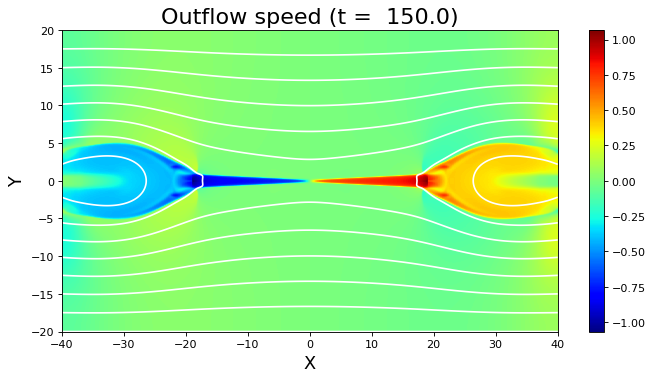

<Figure size 432x288 with 0 Axes>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openmhd
# dummy index
vx=0;vy=1;vz=2;pr=3;ro=4;bx=5;by=6;bz=7;ps=8

# reading the data ...
x,y,t,data = openmhd.data_read("data/field-%05d.dat" % 15)
# reading the data (partial domain: [ix1,ix2] x [jx1,jx2])
# x,y,t,data = openmhd.data_read("data/field-%05d.dat" % 15,ix1=300,ix2=901,jx1=150,jx2=451)

# preparing the canvas
fig = plt.figure(figsize=(10, 5), dpi=80)
# fig.clear()
plt.clf()

# extent: [left, right, bottom, top]
extent=[x[0],x[-1],y[0],y[-1]]
# 2D plot (vmin/mymin: minimum value, vmax/mymax: max value)
# Note: ().T is necessary for 2-D plot routines (imshow/pcolormesh...)
tmp = np.ndarray((x.size,y.size),np.double)
tmp[:,:] = data[:,:,vx]
mymax = max(tmp.max(), -tmp.min()) if( tmp.max() > 0.0 ) else 0.0
mymin = min(tmp.min(), -tmp.max()) if( tmp.min() < 0.0 ) else 0.0
myimg = plt.imshow(tmp.T,origin='lower',vmin=mymin,vmax=mymax,cmap='jet',extent=extent,aspect='auto')

# image operations (e.g. colormaps)
# myimg.set_cmap('jet')
# myimg.set_cmap('RdBu_r')  # colortable(70,/reverse) in IDL
# myimg.set_cmap('seismic')
# myimg.set_cmap('bwr')
# myimg.set_cmap('gist_ncar_r')
# myimg.set_cmap('Pastel1')

# useful options
# plt.grid()
plt.xlabel("X",size=16)
plt.ylabel("Y",size=16)
plt.title('Outflow speed (t = %6.1f)' % t, size=20)
# colorbar
plt.colorbar()

# preparing Vector potential (Az)
az = np.ndarray((x.size,y.size),np.double)
# az[0,0] = 0.0
az[0,-1] = 0.5*(data[0,-1,bx] - data[0,-1,by])
for j in range(y.size-1,0,-1):
    az[0,j-1] = az[0,j] - 0.5*(data[0,j-1,bx]+data[0,j,bx])
for i in range(1,x.size):
    az[i,:] = az[i-1,:] - 0.5*(data[i-1,:,by]+data[i,:,by])

# contour of Az = magnetic field lines
plt.contour(az.T,extent=extent,colors='w',linestyles='solid')

# plot
plt.show()

# adjusting the margins...
plt.tight_layout()

# image file
#plt.savefig('output.png', dpi=80)

# end


 t =  250.0055020907249
 size = ( 2002  x  502 )


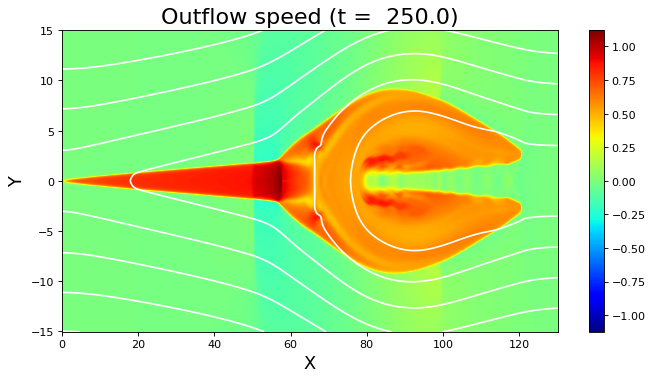

<Figure size 432x288 with 0 Axes>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openmhd
import gc
# dummy index
vx=0;vy=1;vz=2;pr=3;ro=4;bx=5;by=6;bz=7;ps=8

# reading the data ...
# x,y,t,data = openmhd.data_read("data/field-%05d.dat" % 8)
# reading the data (partial domain: [ix1,ix2] x [jx1,jx2])
x,y,t,data = openmhd.data_read("data/field-%05d.dat" % 10,ix1=0,ix2=1301,jx1=0,jx2=151)

# 2D mirroring (This depends on the BC)
ix = x.size
jx = 2*y.size-2
jxh= y.size-1
tmp  = data
data = np.ndarray((ix,jx,9),np.double)
data[:,jxh:,:]   =  tmp[:,1:,:]
data[:,0:jxh, :] =  tmp[:,-1:-jxh-1:-1, :]
data[:,0:jxh,vy] = -tmp[:,-1:-jxh-1:-1,vy]
data[:,0:jxh,vz] = -tmp[:,-1:-jxh-1:-1,vz]
data[:,0:jxh,bx] = -tmp[:,-1:-jxh-1:-1,bx]
data[:,0:jxh,ps] = -tmp[:,-1:-jxh-1:-1,ps]
# releasing the memory, because this tmp could be large
del tmp
gc.collect()

tmp = y
y = np.ndarray((jx),np.double)
y[jxh:]  =  tmp[1:]
y[0:jxh] = -tmp[-1:-jxh-1:-1]

# preparing the canvas
fig = plt.figure(figsize=(10, 5), dpi=80)
# fig.clear()
plt.clf()

# extent: [left, right, bottom, top]
extent=[x[0],x[-1],y[0],y[-1]]
# 2D plot (vmin/mymin: minimum value, vmax/mymax: max value)
# Note: ().T is necessary for 2-D plot routines (imshow/pcolormesh...)
tmp = np.ndarray((x.size,y.size),np.double)
tmp[:,:] = data[:,:,vx]
mymax = max(tmp.max(), -tmp.min()) if( tmp.max() > 0.0 ) else 0.0
mymin = min(tmp.min(), -tmp.max()) if( tmp.min() < 0.0 ) else 0.0
myimg = plt.imshow(tmp.T,origin='lower',vmin=mymin,vmax=mymax,cmap='jet',extent=extent,aspect='auto')

# image operations (e.g. colormaps)
# myimg.set_cmap('jet')
# myimg.set_cmap('RdBu_r')  # colortable(70,/reverse) in IDL
# myimg.set_cmap('seismic')
# myimg.set_cmap('bwr')
# myimg.set_cmap('gist_ncar_r')
# myimg.set_cmap('Pastel1')

# useful options
# plt.grid()
plt.xlabel("X",size=16)
plt.ylabel("Y",size=16)
plt.title('Outflow speed (t = %6.1f)' % t, size=20)
# colorbar
plt.colorbar()

# preparing Vector potential (Az)
az = np.ndarray((x.size,y.size),np.double)
# az[0,0] = 0.0
az[0,-1] = 0.5*(data[0,-1,bx] - data[0,-1,by])
for j in range(y.size-1,0,-1):
    az[0,j-1] = az[0,j] - 0.5*(data[0,j-1,bx]+data[0,j,bx])
for i in range(1,x.size):
    az[i,:] = az[i-1,:] - 0.5*(data[i-1,:,by]+data[i,:,by])

# contour of Az = magnetic field lines
plt.contour(az.T,extent=extent,colors='w',linestyles='solid')

# plot
plt.show()

# adjusting the margins...
plt.tight_layout()

# image file
# plt.savefig('output.png', dpi=80)

# end


In [3]:
# Interactive version by jupyter-notebook / ipywidgets
# To use it, please install jupyter and then activate widgetsnbextension.
# $ pip3 install jupyter
# $ [ pip3 install ipywidgets ]
# $ jupyter nbextension enable --py widgetsnbextension
# Then one can run this sample
# $ jupyter-notebook plot.ipynb

# This sample is designed for the parallel run #2 (ap2.out/plot2.py).

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import openmhd
import gc
import glob
from ipywidgets import interact
# dummy index
vx=0;vy=1;vz=2;pr=3;ro=4;bx=5;by=6;bz=7;ps=8

labels={"Vx":0,"Vy":1,"Vz":2,"Pressure":3,"Density":4,"Bx":5,"By":6,"Bz":7,"Psi":8}
cmaps=['jet','RdBu_r','seismic','gist_ncar_r','gnuplot2']
datalist = sorted(glob.glob('data/field-?????.dat')) # filelist (regular expression)

fig = plt.figure(figsize=(10, 5), dpi=80)

@interact (inputdata=datalist,mylabel=labels,mycmap=cmaps)
def plot(inputdata='data/field-00010.dat',mylabel=0,mycmap='jet'):
    # reading the data ...
    # x,y,t,data = openmhd.data_read(inputdata)
    # reading the data (partial domain: [ix1,ix2] x [jx1,jx2])
    x,y,t,data = openmhd.data_read(inputdata,ix1=0,ix2=1301,jx1=0,jx2=151)
    print(inputdata)

    # 2D mirroring (This depends on the BC)
    ix = x.size
    jx = 2*y.size-2
    jxh= y.size-1
    tmp  = data
    data = np.ndarray((ix,jx,9),np.double)
    data[:,jxh:,:]   =  tmp[:,1:,:]
    data[:,0:jxh, :] =  tmp[:,-1:-jxh-1:-1, :]
    data[:,0:jxh,vy] = -tmp[:,-1:-jxh-1:-1,vy]
    data[:,0:jxh,vz] = -tmp[:,-1:-jxh-1:-1,vz]
    data[:,0:jxh,bx] = -tmp[:,-1:-jxh-1:-1,bx]
    data[:,0:jxh,ps] = -tmp[:,-1:-jxh-1:-1,ps]
    # releasing the memory, because this tmp could be large
    del tmp
    gc.collect()

    tmp = y
    y = np.ndarray((jx),np.double)
    y[jxh:]  =  tmp[1:]
    y[0:jxh] = -tmp[-1:-jxh-1:-1]

    plt.clf()

    # extent: [left, right, bottom, top]
    extent=[x[0],x[-1],y[0],y[-1]]
    # 2D plot (vmin/mymin: minimum value, vmax/mymax: max value)
    # Note: ().T is necessary for 2-D plot routines (imshow/pcolormesh...)
    tmp = np.ndarray((x.size,y.size),np.double)
    tmp[:,:] = data[:,:,mylabel]
    mymax = max(tmp.max(), -tmp.min()) if( tmp.max() > 0.0 ) else 0.0
    mymin = min(tmp.min(), -tmp.max()) if( tmp.min() < 0.0 ) else 0.0
    myimg = plt.imshow(tmp.T,origin='lower',vmin=mymin,vmax=mymax,cmap=mycmap,extent=extent,aspect='auto')

    # useful options
    # plt.grid()
    plt.xlabel("X",size=16)
    plt.ylabel("Y",size=16)
    plt.title('%s (t = %6.1f)' % ( (list(labels.keys()))[mylabel], t), size=20)
    # colorbar
    plt.colorbar()

    # preparing Vector potential (Az)
    az = np.ndarray((x.size,y.size),np.double)
    # az[0,0] = 0.0
    az[0,-1] = 0.5*(data[0,-1,bx] - data[0,-1,by])
    for j in range(y.size-1,0,-1):
        az[0,j-1] = az[0,j] - 0.5*(data[0,j-1,bx]+data[0,j,bx])
    for i in range(1,x.size):
        az[i,:] = az[i-1,:] - 0.5*(data[i-1,:,by]+data[i,:,by])
    plt.contour(az.T,extent=extent,colors='w',linestyles='solid')

    # plot
    plt.show()
    # adjusting the margins...
    plt.tight_layout()


<Figure size 800x400 with 0 Axes>

interactive(children=(Dropdown(description='inputdata', index=10, options=('data/field-00000.dat', 'data/field…